In [100]:
%matplotlib inline
import matplotlib
import pandas as pd # package for data analysis, reading in the data, summarizing data, manipulating data
import numpy as np # package for math operations
import matplotlib.pyplot as plt # package for plotting
from math import radians, cos, sin, asin, sqrt

In [101]:
# read in the data
hubway_data = pd.read_csv('hubway_trips.csv')
station_data = pd.read_csv('hubway_stations.csv', low_memory=False)[['id', 'lat', 'lng']]

# Exercise 
* In this exercise we will explore the relationship between the number of bike checkouts at a particular station and the proximity of the station to Boston's city center
* Please complete the code below to arrive at the final solution
* We will break this up into the following tasks:

1. Obtain the number of bike checkouts for each station
2. Combine number of checkouts for each station with the location of each station
3. Calculate distance to the center of Boston using the provided haversine function below
4. Produce a scatter plot of distance to city center vs. number of checkouts
5. Check if the plot matches your intuition

# Additional Resources
* Check [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)
* Examples for [join method](https://pandas.pydata.org/pandas-docs/stable/merging.html#joining-on-index)
* Documentation for obtaining [counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
* How to [apply a function to a DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) and some [relevant examples](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe)

In [102]:
def haversine(pt, lat2=42.355589, lon2=-71.060175):
    """
    Calculate the distance between two points 
    on the earth (specified in decimal degrees).
    
    pt : longitude and latitude
    lat2 : optional (default=latitude of Boston's city center)
    lon2 : optional (default=longitude of Boston's city center)
    """
    lon1 = pt[0]
    lat1 = pt[1]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in miles
    return c * r

# Obtain number of checkouts for each station

In [103]:
counts_series = hubway_data['strt_statn'].dropna().value_counts()
counts_df = pd.DataFrame(counts_series)
counts_df.head()

,strt_statn
22.0,56443
36.0,42571
53.0,35440
67.0,33685
16.0,32860


In [104]:
station_data.head()

,id,lat,lng
0,3,42.340021,-71.100812
1,4,42.345392,-71.069616
2,5,42.341814,-71.090179
3,6,42.361285,-71.065140
4,7,42.353412,-71.044624


# Join location data with number of checkouts

In [105]:
station_data = station_data.join(counts_df, on='id')
station_data.head()

,id,lat,lng,strt_statn
0,3,42.340021,-71.100812,9734
1,4,42.345392,-71.069616,18058
2,5,42.341814,-71.090179,10630
3,6,42.361285,-71.065140,23322
4,7,42.353412,-71.044624,9163


# Calculate distance to the center of Boston for each station

In [106]:
station_data['dist_to_center'] = station_data[['lng', 'lat']].apply(haversine, axis=1)
station_data.head()

,id,lat,lng,strt_statn,dist_to_center
0,3,42.340021,-71.100812,9734,2.335706
1,4,42.345392,-71.069616,18058,0.853095
2,5,42.341814,-71.090179,10630,1.802423
3,6,42.361285,-71.065140,23322,0.467803
4,7,42.353412,-71.044624,9163,0.807582


Text(0.5,1,'Distance to City Center vs Checkouts')

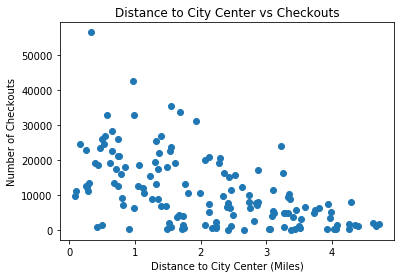

In [107]:
plt.scatter(station_data['dist_to_center'].values, station_data['strt_statn'].values)
plt.xlabel('Distance to City Center (Miles)')
plt.ylabel('Number of Checkouts')
plt.title('Distance to City Center vs Checkouts')